# Lake model continued

In the previous week you used the lake problem as a means of getting aquinted with the workbench. In this assignment we will continue with the lake problem, focussing explicitly on using it for open exploration. You can use the second part of [this tutorial](https://emaworkbench.readthedocs.io/en/latest/indepth_tutorial/open-exploration.html) for help.

**It is paramount that you are using the lake problem with 100 decision variables, rather than the one found on the website with the seperate anthropogenic release decision**

## Apply sensitivity analysis
There is substantial support in the ema_workbench for global sensitivity. For this, the workbench relies on [SALib](https://salib.readthedocs.io/en/latest/) and feature scoring which is a machine learning alternative for global sensitivity analysis. 


1. Apply Sobol with 3 seperate release policies (0, 0.05, and 0.1) and analyse the results for each release policy seperately focusing on the reliability objective. Do the sensitivities change depending on the release policy? Can you explain why or why not?

*hint: you can use sobol sampling for the uncertainties, and set policies to a list with the 3 different release policies. Next, for the analysis using logical indexing on the experiment.policy column you can select the results for each seperate release policy and apply sobol to each of the three seperate release policies. If this sounds too complicated, just do it on each release policy seperately.*



In [82]:
from lakemodel_function import lake_problem
from ema_workbench import (RealParameter, ScalarOutcome, Constant,
                           Model)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments)
ema_logging.log_to_stderr(ema_logging.INFO)

from SALib.analyze import sobol
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis.scenario_discovery_util import RuleInductionType


In [62]:
from lakemodel_function import lake_problem

from ema_workbench import (Model, RealParameter, ScalarOutcome)

#instantiate the model
lake_model = Model('lakeproblem', function=lake_problem)
lake_model.time_horizon = 100 # used to specify the number of timesteps

#specify uncertainties
lake_model.uncertainties = [RealParameter('mean', 0.01, 0.05),
                            RealParameter('stdev', 0.001, 0.005),
                            RealParameter('b', 0.1, 0.45),
                            RealParameter('q', 2.0, 4.5),
                            RealParameter('delta', 0.93, 0.99)]

# set levers, one for each time step
lake_model.levers = [RealParameter(f"l{i}", 0.050000, 0.05000001) for i in 
                     range(lake_model.time_horizon)] # we use time_horizon here

#specify outcomes 
lake_model.outcomes = [ScalarOutcome('max_P'),
                       ScalarOutcome('utility'),
                       ScalarOutcome('inertia'),
                       ScalarOutcome('reliability')] 

In [41]:
policy_list = [0,0.05,0.1] 

In [63]:

with MultiprocessingEvaluator(lake_model) as evaluator:
    sa_results = evaluator.perform_experiments(scenarios=1000, policies = 1,
                                               uncertainty_sampling='sobol')

experiments, outcomes = sa_results



[MainProcess/INFO] pool started
[MainProcess/INFO] performing 1200 scenarios * 1 policies * 1 model(s) = 1200 experiments
[MainProcess/INFO] 120 cases completed
[MainProcess/INFO] 240 cases completed
[MainProcess/INFO] 360 cases completed
[MainProcess/INFO] 480 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] 720 cases completed
[MainProcess/INFO] 840 cases completed
[MainProcess/INFO] 960 cases completed
[MainProcess/INFO] 1080 cases completed
[MainProcess/INFO] 1200 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [64]:
problem = get_SALib_problem(lake_model.uncertainties)
Si = sobol.analyze(problem, outcomes['reliability'],
                   calc_second_order=True, print_to_console=False)

In [65]:
experiments

,b,delta,mean,q,stdev,l0,l1,l10,l11,l12,...,l93,l94,l95,l96,l97,l98,l99,scenario,policy,model
0,0.176904,0.935801,0.030742,3.691895,0.002121,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,36000,2,lakeproblem
1,0.417529,0.935801,0.030742,3.691895,0.002121,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,36001,2,lakeproblem
2,0.176904,0.932754,0.030742,3.691895,0.002121,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,36002,2,lakeproblem
3,0.176904,0.935801,0.045977,3.691895,0.002121,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,36003,2,lakeproblem
4,0.176904,0.935801,0.030742,3.252441,0.002121,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,36004,2,lakeproblem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.354468,0.965244,0.012559,3.839600,0.003592,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,37195,2,lakeproblem
1196,0.354468,0.939346,0.032598,3.839600,0.003592,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,37196,2,lakeproblem
1197,0.354468,0.939346,0.012559,2.260010,0.003592,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,37197,2,lakeproblem
1198,0.354468,0.939346,0.012559,3.839600,0.004885,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,37198,2,lakeproblem


In [66]:
Si

{'S1': array([ 5.53844926e-01, -1.57587446e-04,  1.16805970e-01,  2.72268104e-01,
        -2.85776880e-04]),
 'S1_conf': array([0.21447499, 0.0012799 , 0.12687317, 0.20497019, 0.00044641]),
 'ST': array([7.24719932e-01, 2.23877999e-05, 1.23631991e-01, 4.92636191e-01,
        2.97890027e-06]),
 'ST_conf': array([1.79045690e-01, 2.42587782e-05, 6.72910512e-02, 1.56380648e-01,
        2.16125887e-06]),
 'S2': array([[            nan, -5.20399707e-02, -1.02937507e-01,
          6.74809667e-02, -5.18655993e-02],
        [            nan,             nan, -7.00827248e-05,
         -1.07528752e-04, -8.13849226e-05],
        [            nan,             nan,             nan,
         -1.06607795e-01, -1.20847569e-01],
        [            nan,             nan,             nan,
                     nan, -3.44026143e-02],
        [            nan,             nan,             nan,
                     nan,             nan]]),
 'S2_conf': array([[       nan, 0.21194852, 0.22501085, 0.22483998, 0

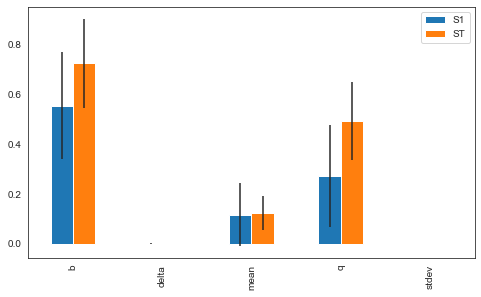

In [67]:
scores_filtered = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(scores_filtered, index=problem['names'])

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.show()

2. Repeat the above analysis for the 3 release policies but now with extra trees feature scoring and for all outcomes of interest. As a bonus, use the sobol experiment results as input for extra trees, and compare the results with those resulting from latin hypercube sampling.

*hint: you can use [seaborn heatmaps](https://seaborn.pydata.org/generated/seaborn.heatmap.html) for a nice figure of the results*


NameError: name 'y' is not defined

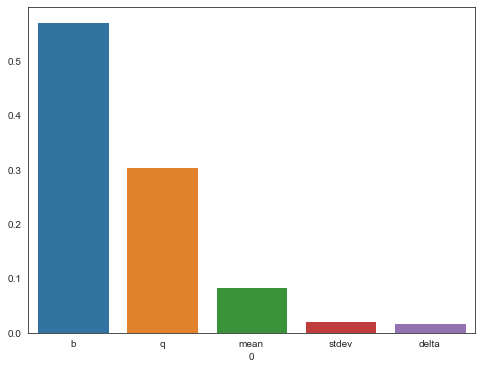

In [85]:
X = experiments[['b', 'delta', 'mean','q','stdev']]


uncertainty_score, extra_trees_regressor =feature_scoring.get_ex_feature_scores(x = X,
                                        y =outcomes['reliability'],
                                        nr_trees=100,
                                        max_features = 0.6,
                                        mode = RuleInductionType.REGRESSION)

# plotting the results
#sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1)
fig.set_size_inches(8,6)
ax = sns.barplot( data=uncertainty_score.transpose())
ax.set_title(str(y))
fig.subplots_adjust(bottom=0.3)
plt.show()

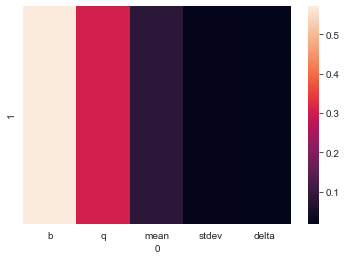

In [86]:
sns.heatmap(data=uncertainty_score.transpose())